In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [ ]:
df = pd.read_pickle('turgidi')

In [5]:
list_numbers = [1,2,3,4,4,4,5,4,6,7,8,2,3,4]
matrix = zeros([max(list_numbers)+1,max(list_numbers)+1])

In [13]:
for i in range(len(list_numbers)):
    try:
        print(list_numbers[i],list_numbers[i+1])
        matrix[list_numbers[i-1]][list_numbers[i]] = matrix[list_numbers[i-1]][list_numbers[i]]+1.0 
    except IndexError:
        continue
        

1 2
2 3
3 4
4 4
4 4
4 5
5 4
4 6
6 7
7 8
8 2
2 3
3 4


In [14]:
matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 2., 0., 0., 4., 2., 2., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0.]])

In [33]:
def graph_link(no1,no2,order):
    if order==0:
        return
    rad = (max(no1,no2)-min(no1,no2))/2.0
    t = linspace(0,pi,100)
    x = [(no1+no2)/2.+rad*cos(ti) for ti in t]
    y = [rad*sin(ti) for ti in t]
    return(x,y)

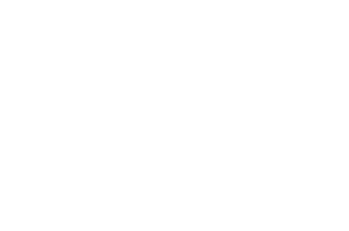

In [48]:
fig, ax = subplots()

ax.plot(list_numbers,[0 for xi in list_numbers],'wo')
ax.plot([1,8],[0,0],'w--')
#create the radial thing from 2 to 3
x,y = graph_link(6,7,1)
ax.plot(x,[-yi for yi in y],'w--')
x,y = graph_link(5,7,1)
ax.plot(x,[-yi for yi in y],'w--')
x,y = graph_link(6,7,1)
ax.plot(x,y,'w--')
x,y = graph_link(6,8,1)
ax.plot(x,y,'w--')
x,y = graph_link(4,6,1)
ax.plot(x,y,'w--')
ax.set_ylim([-3,3])
ax.axis('off')

savefig('transition_graph1.pdf',transparent=True)


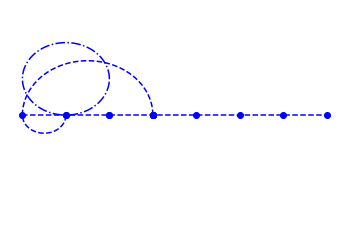

In [76]:
fig, ax = subplots()

ax.plot(list_numbers,[0 for xi in list_numbers],'bo')
ax.plot([1,8],[0,0],'b--')
#create the radial thing from 2 to 3
t=linspace(0,2*pi,100)
ax.plot([cos(ti)+2 for ti in t],[sin(ti)+1 for ti in t],'b-.')
ax.axis('off')
x,y = graph_link(1,2,1)
ax.plot(x,[-1*yi for yi in y],'b--')
x,y = graph_link(1,4,1)
ax.plot(x,[1*yi for yi in y],'b--')
ax.set_ylim([-3,3])
savefig('path_graph1.pdf',transparent=True)


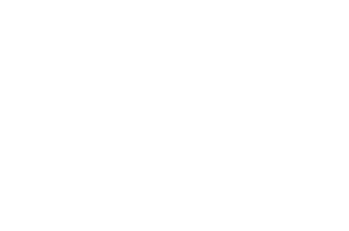

In [73]:
fig, ax = subplots()

ax.plot(list_numbers[:4],[0 for xi in list_numbers[:4]],'wo')
ax.plot([1,4],[0,0],'w--')
#create the radial thing from 2 to 3
ax.axis('off')
ax.set_xlim([0,8])

savefig('path_graph2.pdf',transparent=True)


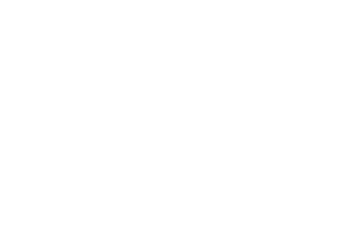

In [58]:
fig, ax = subplots()

ax.plot(list_numbers[:4],[0 for xi in list_numbers[:4]],'wo')
ax.plot([1,4],[0,0],'w--')
#create the radial thing from 2 to 3
ax.axis('off')
ax.set_xlim([0,8])
x,y = graph_link(1,2,1)
ax.plot(x,y,'w--')
x,y = graph_link(2,3,1)
ax.plot(x,y,'w--')
x,y = graph_link(3,4,1)
ax.plot(x,y,'w--')
x,y = graph_link(1,2,1)
ax.plot(x,[-1*yi for yi in y],'w--')
x,y = graph_link(1,4,1)
ax.plot(x,[-1*yi for yi in y],'w--')
x,y = graph_link(2,4,1)
ax.plot(x,[-1*yi for yi in y],'w--')
ax.set_ylim([-3,3])

savefig('goal_graph1.pdf',transparent=True)


In [3]:
import plotly.express as px

In [4]:
import plotly.graph_objs as go

In [76]:
data = [# Portfolio (inner donut)
        go.Pie(values=[60],
               labels=['Total clicks'],
               domain={'x':[0.2,0.8], 'y':[0.1,0.9]},
               hole=0.6,
               direction='clockwise',
               sort=False,
               marker={'colors':['#1f77b4']}),
        go.Pie(values=[60],
               labels=['Total clicks'],
               domain={'x':[0.2,0.8], 'y':[0.1,0.9]},
               hole=0.65,
               direction='clockwise',
               sort=False,
               marker={'colors':['white']}),
    # Portfolio (inner donut)
        go.Pie(values=[20,40],
               labels=['1 click','Multi click'],
               domain={'x':[0.2,0.8], 'y':[0.1,0.9]},
               hole=0.70,
               direction='clockwise',
               sort=False,
               marker={'colors':['#ffa07a','#ff8072']}),
        # Individual components (outer donut)
        go.Pie(values=[5,15,30,10],
               labels=['Purchase','Experience','Purchase','Experience'],
               domain={'x':[0.1,0.9], 'y':[0,1]},
               hole=0.80,
               direction='clockwise',
               sort=False,
               marker={'colors':['lightseagreen','darkcyan','darkseagreen','darkseagreen']},
               showlegend=False)]
fig1 = go.Figure(data=data)
fig1.update_layout(
    showlegend=False,
    autosize=False,
    width=500,
    height=500,
    title={
        'text': "Clicks",
        'y':0.5,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig1.show()

In [85]:
data = [# Portfolio (inner donut)
        go.Pie(values=[60,10],
               labels=['Data Available','Not Available'],
               domain={'x':[0.2,0.8], 'y':[0.1,0.9]},
               hole=0.85,
               direction='clockwise',
               sort=False,
               marker={'colors':['lightseagreen','darkcyan']}),
        ]
pie2 = go.Figure(data=data)
pie2.update_layout(
    showlegend=False,
    autosize=False,
    width=350,
    height=350,
    title={
        'text': "Purchases",
        'y':0.5,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
pie2.show()

In [86]:
data = [# Portfolio (inner donut)
        go.Pie(values=[60,10],
               labels=['Data Available','Not Available'],
               domain={'x':[0.2,0.8], 'y':[0.1,0.9]},
               hole=0.80,
               direction='clockwise',
               sort=False,
               marker={'colors':['lightseagreen','darkcyan']}),
        ]
pie3 = go.Figure(data=data)
pie3.update_layout(
    showlegend=False,
    autosize=False,
    width=300,
    height=300,
    title={
        'text': "Users",
        'y':0.5,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
pie3.show()

In [87]:
df = pd.read_csv('../data/JD_user_data.csv')

In [146]:
df.head()

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1


In [90]:
clicks = pd.read_csv('../data/JD_click_data.csv')

In [184]:
u= df.user_ID[:300]

In [185]:
cks=clicks.loc[clicks['user_ID'].isin(u)].sort_values(by='user_ID')

In [186]:
click_l = cks.user_ID.to_numpy()

In [187]:
from itertools import groupby

In [188]:
click_len = []
u = []
for key, group in groupby(click_l):
    u.append(key)
    click_len.append(len(list(group)))

In [189]:
shape(click_len)

(255,)

In [190]:
edu_level = []
for pu in u:
    edu_level.append(df[df.user_ID==pu].education.to_numpy()[0])

In [191]:
pur_level = []
for pu in u:
    if df[df.user_ID==pu].purchase_power.to_numpy()[0]==-1:
        pur_level.append(5)
    else:
        pur_level.append(df[df.user_ID==pu].purchase_power.to_numpy()[0])

In [192]:
city_level = []
for pu in u:
    city_level.append(df[df.user_ID==pu].city_level.to_numpy()[0])

In [193]:
edu_level = [xi+random.rand()*.3 for xi in edu_level]

In [194]:
city_level = [xi+random.rand()*.3 for xi in city_level]

In [199]:
d_fin = pd.DataFrame(transpose([u,click_len,edu_level,city_level,pur_level]),columns=['User','Clicks','Education','City','PurchasePower'])
d_fin.head(5)

,User,Clicks,Education,City,PurchasePower
0,000089d6a6,10,3.1029672303319162,4.024338968479396,3
1,0000babd1f,2,-0.9361839595996491,-0.8252822194100743,5
2,0000bc018b,16,3.0179539337517216,2.272132716004572,3
3,0000d0e5ab,2,3.086283182996005,2.0556242488603123,2
4,0000dce472,18,-0.8180169369012065,-0.9755876247879517,5


In [200]:
d_fin["Clicks"] = pd.to_numeric(d_fin["Clicks"])
d_fin = d_fin.sort_values(by='PurchasePower')

In [201]:
fig = px.scatter(d_fin, x="Education", y="City", size="Clicks", color="PurchasePower",
           hover_name="User", log_x=True, size_max=30)
fig.show()

In [202]:
d_fin.to_pickle('main.pkl')